In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd

# change between final5b_weekly, final5b_daily, and finalMerged to swap between files
# pd.read_csv("/content/drive/MyDrive/CSC442 Team Project/Output/final5b_weekly.csv")

df = pd.read_csv("/content/drive/MyDrive/CSC442 Team Project/Output/final5b_weekly.csv")


print(df.shape)
df.head()


Mounted at /content/drive
(3442, 9)


,Country,Date,<OPEN>,<CLOSE>,<VOL>,GDP,GNI (USD),Population,Exchange Rate (AMA)
0,"China, Hong Kong SAR",2016-02-21,906.700,910.2075,1.096639e+10,3.210000e+11,3.290000e+11,7435927.0,7.76225
1,"China, Hong Kong SAR",2016-02-28,922.902,922.7400,1.153907e+10,3.210000e+11,3.290000e+11,7435927.0,7.76225
2,"China, Hong Kong SAR",2016-03-06,926.802,929.9140,1.463376e+10,3.210000e+11,3.290000e+11,7435927.0,7.76225
3,"China, Hong Kong SAR",2016-03-13,945.964,946.4140,1.297752e+10,3.210000e+11,3.290000e+11,7435927.0,7.76225
4,"China, Hong Kong SAR",2016-03-20,949.020,950.2620,1.423008e+10,3.210000e+11,3.290000e+11,7435927.0,7.76225


The above code reads in the dataframe for quarterly stock performance from our shared Google Drive folder. Next I filter the dataset down to use only the columns my portion of the analysis cares about.

In [ ]:

# scale the GDP down to values for a more reasonable slope result in regression
df["GDP"] = df["GDP"] / 1e11

# these columns will be included in the subset of the data
query_columns = ["Country", "GDP", "<CLOSE>"]

# copy just our desired columns
query_df = df[query_columns].copy()

print(query_df.shape) # should be 3442 rows, 3 columns
query_df.head(2)

(3442, 3)


,Country,GDP,<CLOSE>
0,"China, Hong Kong SAR",3.21,910.2075
1,"China, Hong Kong SAR",3.21,922.7400


In this section I split the data into individual sets by country, because the typical values for GDP are very different by country, and the stock performance values may or may not also rely on which country the market belongs to.

In [ ]:
countries = query_df["Country"].unique()

for country in countries:
  #filter by country
  country_data = query_df[query_df["Country"] == country]

  # print out data associations by country
  print(f"\nSummary stats for {country}:")
  print("GDP: \n")
  print(country_data["GDP"].describe())
  print("\nPerformance: \n")
  print(country_data["<CLOSE>"].describe())




Summary stats for China, Hong Kong SAR:
GDP: 

count    307.000000
mean       3.507484
std        0.160762
min        3.210000
25%        3.410000
50%        3.620000
75%        3.630000
max        3.690000
Name: GDP, dtype: float64

Performance: 

count     307.000000
mean      711.967607
std       216.692196
min       426.898000
25%       509.799667
50%       644.526000
75%       956.208000
max      1041.008000
Name: <CLOSE>, dtype: float64

Summary stats for Germany:
GDP: 

count    307.000000
mean      38.694137
std        2.392519
min       34.700000
25%       36.900000
50%       38.900000
75%       39.700000
max       42.600000
Name: GDP, dtype: float64

Performance: 

count     307.000000
mean      967.170687
std        99.141276
min       636.516000
25%       905.157000
50%       955.602000
75%      1032.351000
max      1170.598000
Name: <CLOSE>, dtype: float64

Summary stats for Hungary:
GDP: 

count    307.000000
mean       1.565385
std        0.163775
min        1.290000
25

From here I graph the association between GDP and performance. The following code was adapted from Google Gemini output when prompted to graph the relationship between GDP and stock market performance by country. Gemini originally created a general-purpose function to act on any dataframe with these columns given the column names as parameters; I trimmed it down to use our specific data set.

I understand the stages the code goes through, filtering data into subsets by country and then graphing those. The main reason I used Gemini was because I am newer to Python and unfamiliar with the ins and outs of its many libraries - I have detailed this in the AI write-up for my submission.

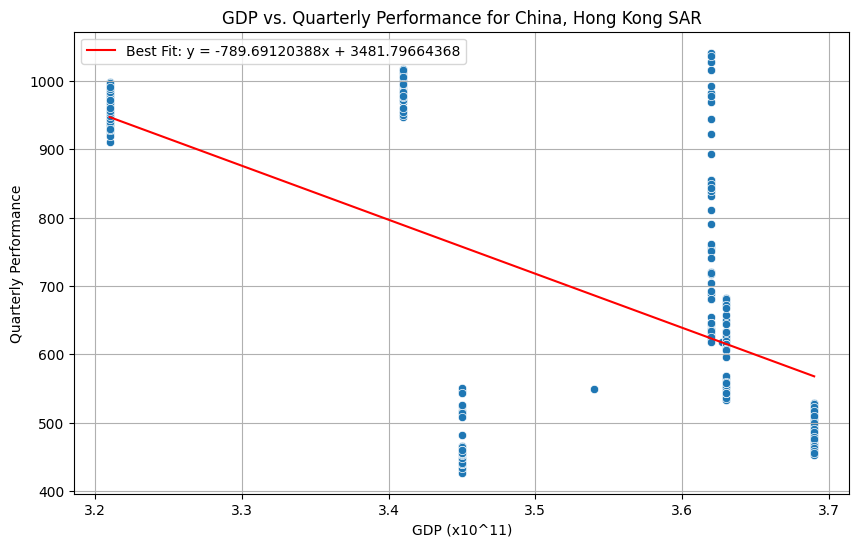

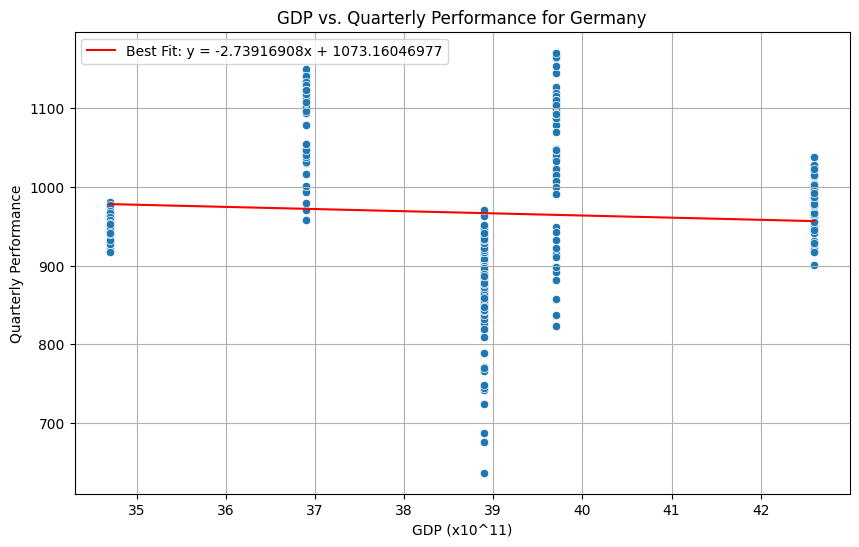

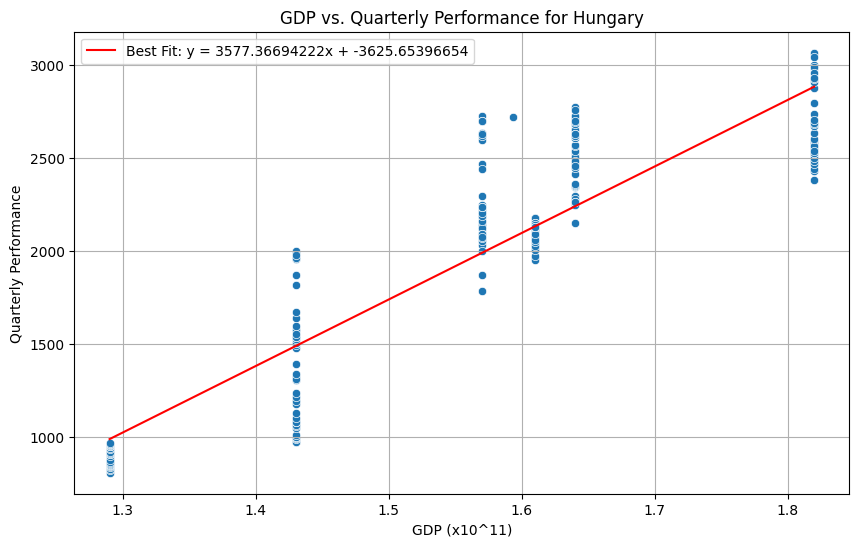

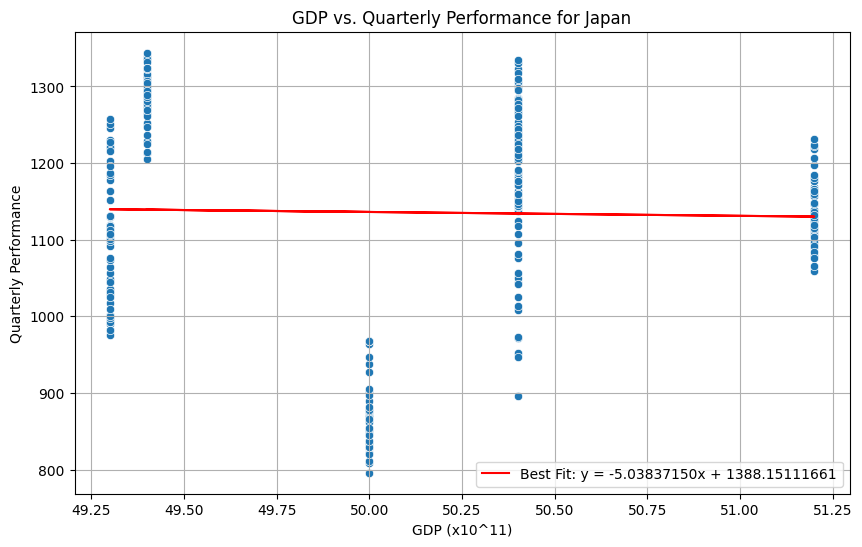

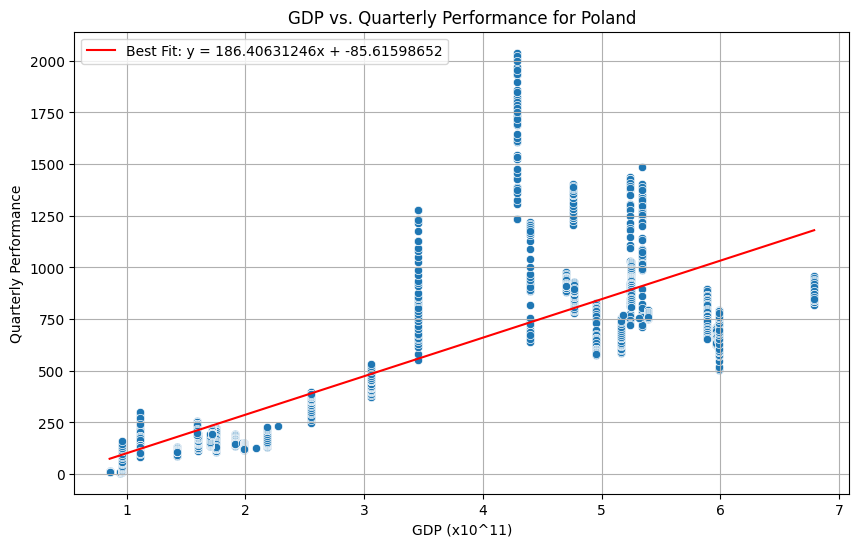

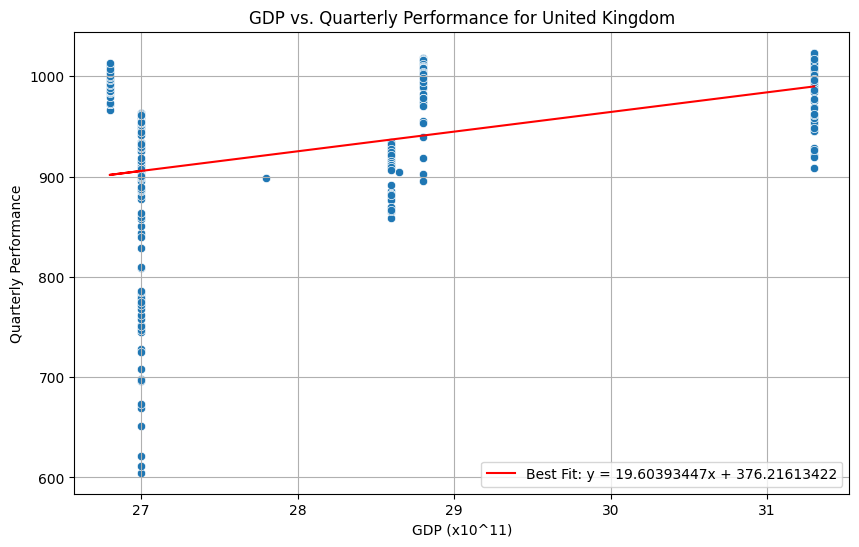

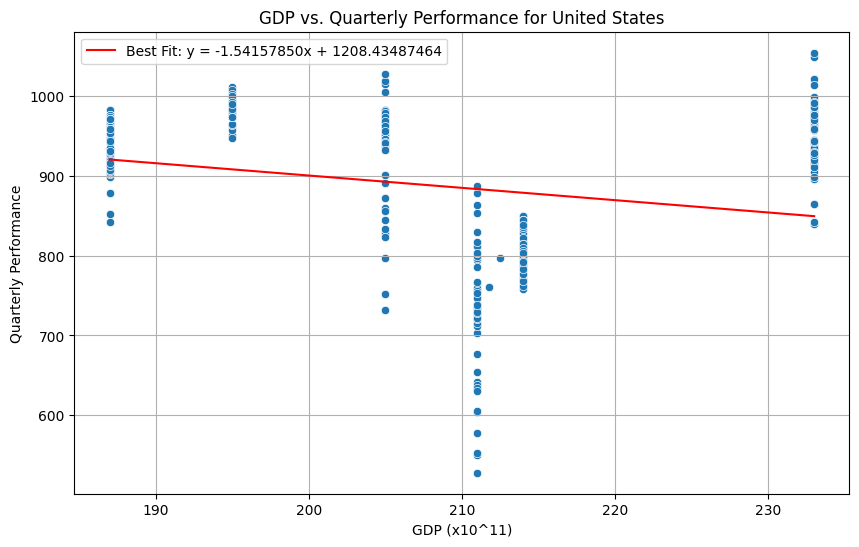

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# dictionary to store resulting data
results = {}

for country in countries:
    # filter by country
    country_data = df[df["Country"] == country]

    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sb.scatterplot(x="GDP", y="<CLOSE>", data=country_data)

    # perform linear Regression
    x = country_data["GDP"]
    y = country_data["<CLOSE>"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # store the results for later
    results[country] = {
        "slope": slope,
        "intercept": intercept,
        "r_squared": r_value * r_value,
        "p_value": p_value,
        "std_err": std_err
    }

    # create and plot line of best fit
    line = slope * x + intercept
    plt.plot(x, line, color='red', label=f'Best Fit: y = {slope:.8f}x + {intercept:.8f}')

    plt.title(f"GDP vs. Quarterly Performance for {country}")
    plt.xlabel("GDP (x10^11)")
    plt.ylabel("Quarterly Performance")
    plt.grid(True)
    plt.legend()  # Add legend to show the line equation
    plt.show()


Here I log the regression parameters for each country. I am primarily interested in the r_squared value for the strength of correlations.

In [ ]:
# print out the results for each country's linear regression
print("Linear Regression Results per Country:")
for country, data in results.items():
    print(f"\n--- {country} ---")
    for key, value in data.items():
        print(f"{key}: {value:.4f}")  # Format to 4 decimal places for display

Linear Regression Results per Country:

--- China, Hong Kong SAR ---
slope: -789.6912
intercept: 3481.7966
r_squared: 0.3432
p_value: 0.0000
std_err: 62.5483

--- Germany ---
slope: -2.7392
intercept: 1073.1605
r_squared: 0.0044
p_value: 0.2482
std_err: 2.3675

--- Hungary ---
slope: 3577.3669
intercept: -3625.6540
r_squared: 0.8166
p_value: 0.0000
std_err: 97.0839

--- Japan ---
slope: -5.0384
intercept: 1388.1511
r_squared: 0.0005
p_value: 0.6910
std_err: 12.6653

--- Poland ---
slope: 186.4063
intercept: -85.6160
r_squared: 0.6133
p_value: 0.0000
std_err: 3.7014

--- United Kingdom ---
slope: 19.6039
intercept: 376.2161
r_squared: 0.1278
p_value: 0.0000
std_err: 2.9330

--- United States ---
slope: -1.5416
intercept: 1208.4349
r_squared: 0.0459
p_value: 0.0002
std_err: 0.4023


Conclusions:

It would seem that directly using GDP to predict stock performance would be unfeasible for a few reasons. Firstly, each country has vastly different typical GDP values, so this rules out a general approach (these are also enourmous, so I scaled each down by a factor of 10^11 to get digits for slopes to actually print on the graphs). Secondly, even within individual countries, I fear the GDP data is too coarse-grained in time to be especially useful. Thirdly, the correlations themselves are not particularly strong: Hungary and Poland are standout exceptions. A visual analysis of the graphs confirms this: the lines do seem to generally point through most of the data, but the data is too disparately scattered for them to fit all of the data clearly. In some cases, like Japan, it is clear that the association, if any exists, would not be linear.

The most interesting thing of note is that there is no clear general trend; I had figured that higher GDP might generally and vaguagely correspond to a better stock performance, but for some of the countries the trend is negative.